# Loading the MNIST dataset in Keras

The Keras deep learning library provides a convenience method for loading the MNIST dataset.

In [1]:
# To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first 4 images in the training dataset.

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


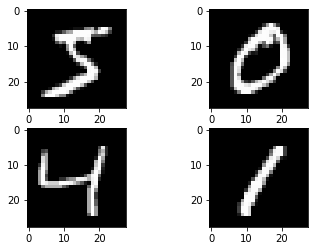

In [2]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

# Baseline Model with Multi-Layer Perceptrons

In [3]:
# Importing Keras libraries 
import numpy
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:
# fix random seed for ensuring reproducibility
seed = 7
numpy.random.seed(seed)

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1 scale
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# One Hot Encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# Define Baseline Function for Multi-Layer-Perceptron Model
def model_mlp():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim =num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
# Building the model
model = model_mlp()

# Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("baseline Error: %2.f%%" % (100-scores[1]*100))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.2811 - acc: 0.9206 - val_loss: 0.1413 - val_acc: 0.9576
Epoch 2/10
 - 4s - loss: 0.1117 - acc: 0.9676 - val_loss: 0.0916 - val_acc: 0.9715
Epoch 3/10
 - 4s - loss: 0.0714 - acc: 0.9798 - val_loss: 0.0779 - val_acc: 0.9774
Epoch 4/10
 - 4s - loss: 0.0501 - acc: 0.9858 - val_loss: 0.0736 - val_acc: 0.9770
Epoch 5/10
 - 4s - loss: 0.0369 - acc: 0.9893 - val_loss: 0.0673 - val_acc: 0.9787
Epoch 6/10
 - 4s - loss: 0.0266 - acc: 0.9930 - val_loss: 0.0634 - val_acc: 0.9803
Epoch 7/10
 - 4s - loss: 0.0208 - acc: 0.9947 - val_loss: 0.0605 - val_acc: 0.9814
Epoch 8/10
 - 4s - loss: 0.0138 - acc: 0.9971 - val_loss: 0.0600 - val_acc: 0.9814
Epoch 9/10
 - 4s - loss: 0.0108 - acc: 0.9979 - val_loss: 0.0563 - val_acc: 0.9816
Epoch 10/10
 - 4s - loss: 0.0079 - acc: 0.9986 - val_loss: 0.0568 - val_acc: 0.9815
baseline Error:  2%

# Implementing Simple Convolutional Neural Network for MNIST

Next we define our Convolutional Neural Network Model.

1. The first hidden layer is a convolutional layer called a Convolution2D. The layer has 32 feature maps, which with the size of 5×5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above [pixels][width][height].
2. Next we define a pooling layer that takes the max called MaxPooling2D. It is configured with a pool size of 2×2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next a fully connected layer with 128 neurons and rectifier activation function.

In [10]:
# Importing the rest of the libraries for CNN
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

In [11]:
# We need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][pixels] [width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [12]:
# normalizing the inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# One Hot Endoing outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [13]:
# Defining function for CNN
def model_simple_cnn():
    # create cnn model
    model = Sequential()
    model.add(Conv2D(32, (5,5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # complie model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
# Building CNN model
model = model_simple_cnn()

# Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %2.f%%" % (100-scores[1]*100))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 38s - loss: 0.2431 - acc: 0.9309 - val_loss: 0.0700 - val_acc: 0.9783
Epoch 2/10
 - 37s - loss: 0.0695 - acc: 0.9794 - val_loss: 0.0468 - val_acc: 0.9851
Epoch 3/10
 - 36s - loss: 0.0496 - acc: 0.9853 - val_loss: 0.0371 - val_acc: 0.9883
Epoch 4/10
 - 36s - loss: 0.0378 - acc: 0.9880 - val_loss: 0.0349 - val_acc: 0.9885
Epoch 5/10
 - 36s - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0453 - val_acc: 0.9869
Epoch 6/10
 - 38s - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0360 - val_acc: 0.9871
Epoch 7/10
 - 36s - loss: 0.0209 - acc: 0.9935 - val_loss: 0.0356 - val_acc: 0.9888
Epoch 8/10
 - 36s - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0328 - val_acc: 0.9890
Epoch 9/10
 - 36s - loss: 0.0163 - acc: 0.9944 - val_loss: 0.0391 - val_acc: 0.9875
Epoch 10/10
 - 41s - loss: 0.0129 - acc: 0.9961 - val_loss: 0.0302 - val_acc: 

# Implementing Larger Convolutional Neural Network for MNIST

Defining a large CNN architecture with additional convolutional, max pooling layers and fully connected layers. The network topology can be summarized as follows.

1. Convolutional layer with 30 feature maps of size 5×5.
2. Pooling layer taking the max over 2*2 patches.
3. Convolutional layer with 15 feature maps of size 3×3.
4. Pooling layer taking the max over 2*2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

In [16]:
# Defining the Function for Larger CNN Model
def model_larger_cnn():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5,5), input_shape=(1,28,28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
# Building the Larger CNN Model
model = model_larger_cnn()

# Fitting the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("larger CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.3785 - acc: 0.8876 - val_loss: 0.0783 - val_acc: 0.9758
Epoch 2/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0978 - acc: 0.9699 - val_loss: 0.0577 - val_acc: 0.9829
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0715 - acc: 0.9781 - val_loss: 0.0436 - val_acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0593 - acc: 0.9816 - val_loss: 0.0343 - val_acc: 0.9885
Epoch 5/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0496 - acc: 0.9843 - val_loss: 0.0324 - val_acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.0450 - acc: 0.9863 - val_loss: 0.0324 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.0398 - acc: 0.9873 - val_loss: 0.0272 - val_acc